In [58]:
from google.colab import drive
drive.mount('/content/drive')
!cp "BankLoan.ipynb" "/content/drive/My Drive/"



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
cp: cannot stat 'BankLoan.ipynb': No such file or directory


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt




In [4]:
from google.colab import files
uploaded = files.upload()


Saving samplebankloandata.xlsx to samplebankloandata.xlsx


In [7]:
import pandas as pd

df = pd.read_excel('/content/samplebankloandata.xlsx')
df.head()


,id,year,issue_d,final_d,emp_length_int,home_ownership,home_ownership_cat,income_category,annual_inc,income_cat,...,loan_condition_cat,interest_rate,grade,grade_cat,dti,total_pymnt,total_rec_prncp,recoveries,installment,region
0,1077501,2011,2011-01-12,1012015,10.0,RENT,1,Low,24000,1,...,0,10.65,B,2,27.65,5861.071414,5000.00,0.00,162.87,munster
1,1077430,2011,2011-01-12,1042013,0.5,RENT,1,Low,30000,1,...,1,15.27,C,3,1.00,1008.710000,456.46,117.08,59.83,leinster
2,1077175,2011,2011-01-12,1062014,10.0,RENT,1,Low,12252,1,...,0,15.96,C,3,8.72,3003.653644,2400.00,0.00,84.33,cannught
3,1076863,2011,2011-01-12,1012015,10.0,RENT,1,Low,49200,1,...,0,13.49,C,3,20.00,12226.302210,10000.00,0.00,339.31,ulster
4,1075358,2011,2011-01-12,1012016,1.0,RENT,1,Low,80000,1,...,0,12.69,B,2,17.94,3242.170000,2233.10,0.00,67.79,ulster


In [9]:
print(df.columns)

Index(['id', 'year', 'issue_d', 'final_d', 'emp_length_int', 'home_ownership',
       'home_ownership_cat', 'income_category', 'annual_inc', 'income_cat',
       'loan_amount', 'term', 'term_cat', 'application_type',
       'application_type_cat', 'purpose', 'purpose_cat', 'interest_payments',
       'interest_payment_cat', 'loan_condition', 'loan_condition_cat',
       'interest_rate', 'grade', 'grade_cat', 'dti', 'total_pymnt',
       'total_rec_prncp', 'recoveries', 'installment', 'region'],
      dtype='object')


In [10]:
null_values = df.isnull().sum()
print(null_values)



id                      0
year                    0
issue_d                 0
final_d                 0
emp_length_int          0
home_ownership          0
home_ownership_cat      0
income_category         0
annual_inc              0
income_cat              0
loan_amount             0
term                    0
term_cat                0
application_type        0
application_type_cat    0
purpose                 0
purpose_cat             0
interest_payments       0
interest_payment_cat    0
loan_condition          0
loan_condition_cat      0
interest_rate           0
grade                   0
grade_cat               0
dti                     0
total_pymnt             0
total_rec_prncp         0
recoveries              0
installment             0
region                  0
dtype: int64


In [11]:
# Check uniqueness and missing values
print("Number of unique IDs:", df['id'].nunique())
print("Number of missing values:", df['id'].isnull().sum())


Number of unique IDs: 95902
Number of missing values: 0


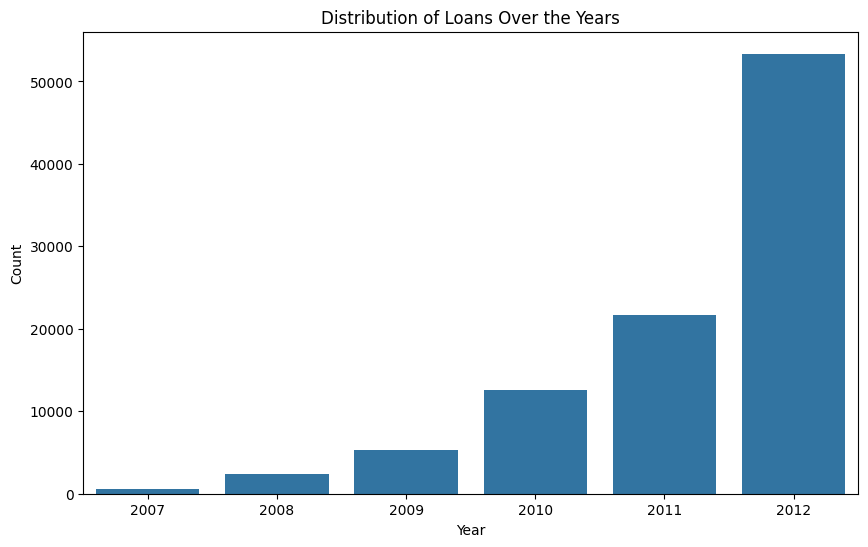

In [12]:
# Distribution of loans over the years
plt.figure(figsize=(10, 6))
sns.countplot(x='year', data=df)
plt.title('Distribution of Loans Over the Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()


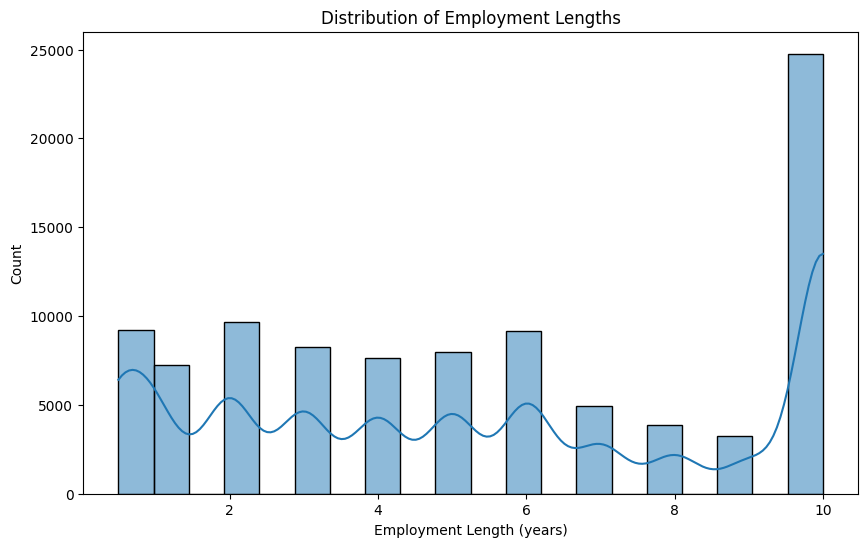

In [ ]:
# Distribution of employment lengths
plt.figure(figsize=(10, 6))
sns.histplot(df['emp_length_int'], bins=20, kde=True)
plt.title('Distribution of Employment Lengths')
plt.xlabel('Employment Length (years)')
plt.ylabel('Count')
plt.show()


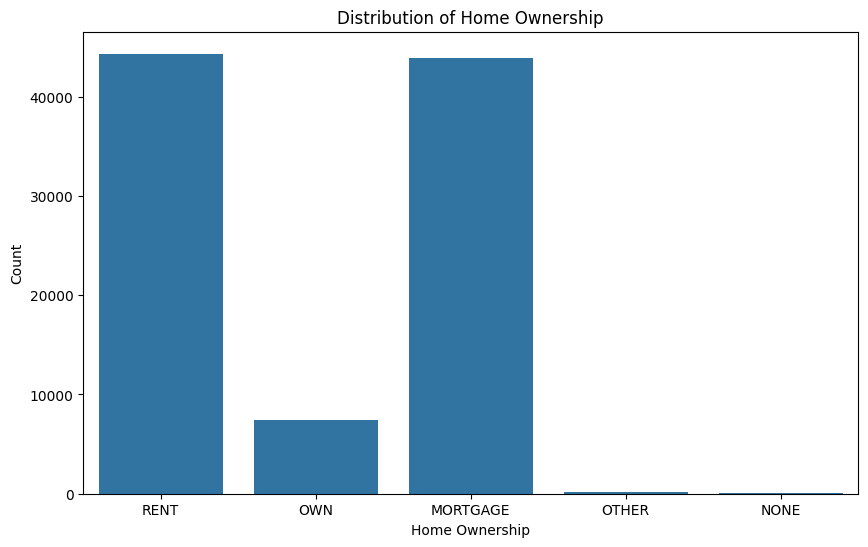

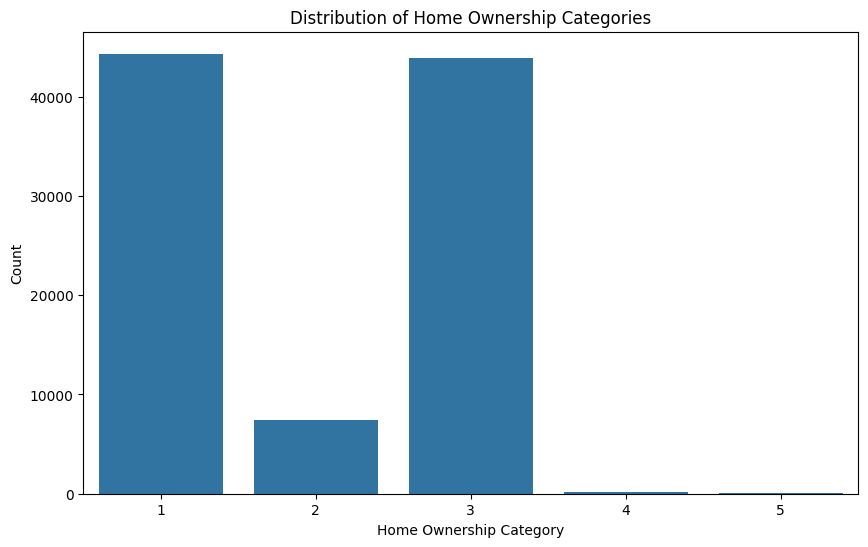

In [ ]:
# Distribution of home ownership
plt.figure(figsize=(10, 6))
sns.countplot(x='home_ownership', data=df)
plt.title('Distribution of Home Ownership')
plt.xlabel('Home Ownership')
plt.ylabel('Count')
plt.show()

# Distribution of home ownership categories
plt.figure(figsize=(10, 6))
sns.countplot(x='home_ownership_cat', data=df)
plt.title('Distribution of Home Ownership Categories')
plt.xlabel('Home Ownership Category')
plt.ylabel('Count')
plt.show()


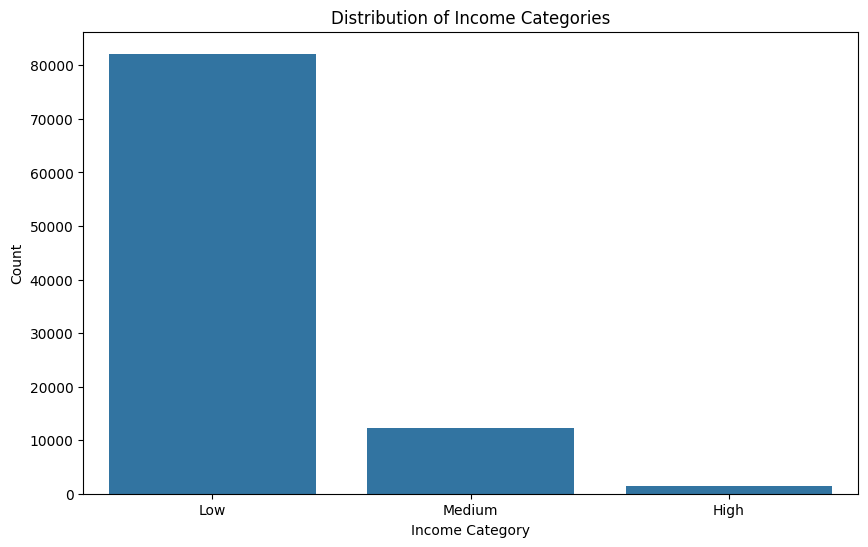

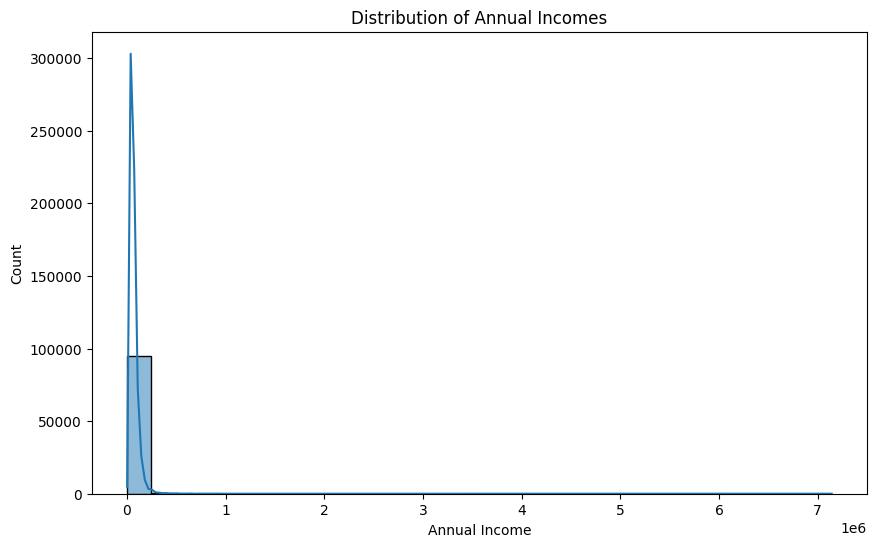

In [13]:
# Distribution of income categories
plt.figure(figsize=(10, 6))
sns.countplot(x='income_category', data=df)
plt.title('Distribution of Income Categories')
plt.xlabel('Income Category')
plt.ylabel('Count')
plt.show()

# Distribution of annual incomes
plt.figure(figsize=(10, 6))
sns.histplot(df['annual_inc'], bins=30, kde=True)
plt.title('Distribution of Annual Incomes')
plt.xlabel('Annual Income')
plt.ylabel('Count')
plt.show()


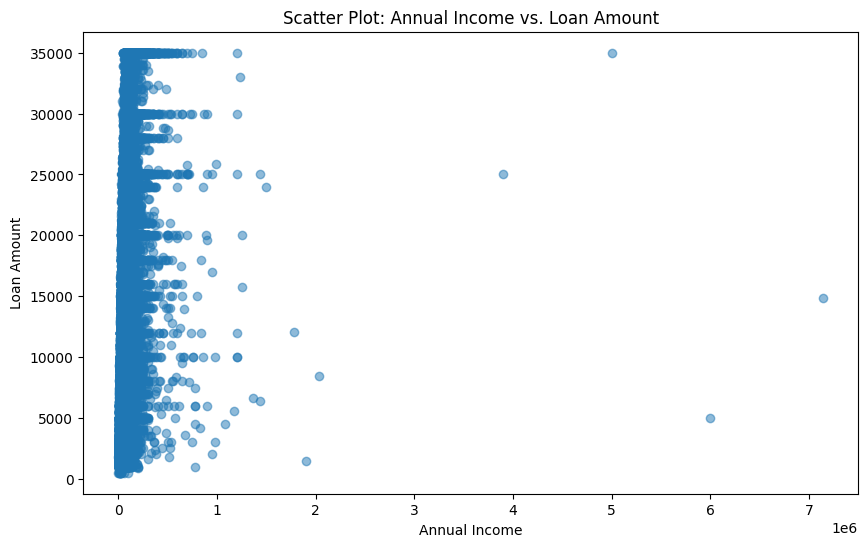

In [15]:
# Scatter plot: Annual Income vs. Loan Amount
plt.figure(figsize=(10, 6))
plt.scatter(df['annual_inc'], df['loan_amount'], alpha=0.5)
plt.title('Scatter Plot: Annual Income vs. Loan Amount')
plt.xlabel('Annual Income')
plt.ylabel('Loan Amount')
plt.show()


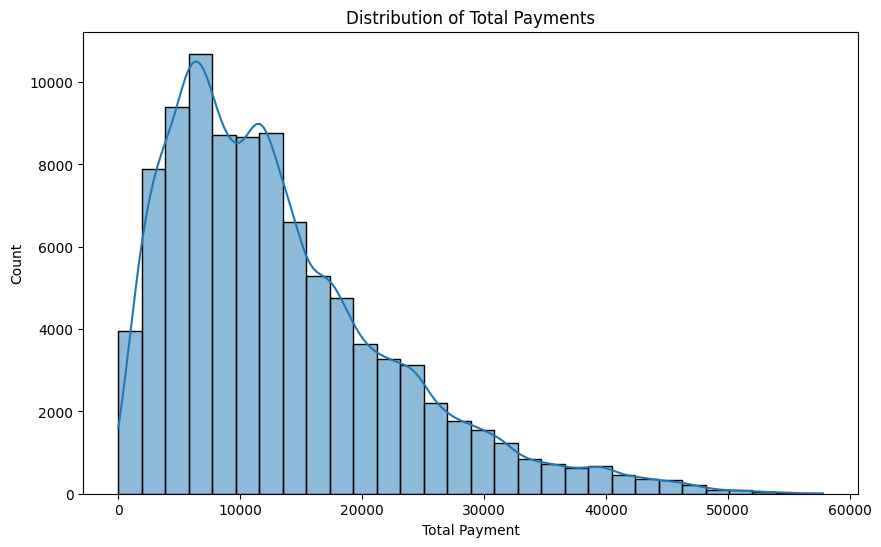

In [16]:
# Distribution of total payments
plt.figure(figsize=(10, 6))
sns.histplot(df['total_pymnt'], bins=30, kde=True)
plt.title('Distribution of Total Payments')
plt.xlabel('Total Payment')
plt.ylabel('Count')
plt.show()


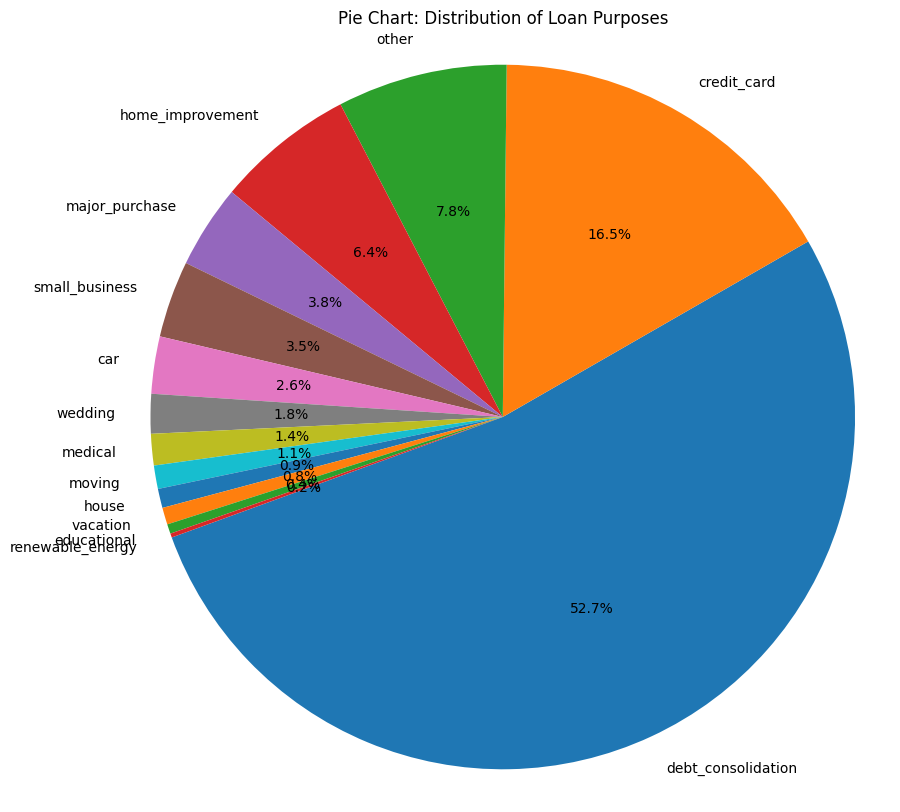

In [23]:
# Pie chart: Distribution of Loan Purposes
plt.figure(figsize=(10, 10))
purpose_counts = df['purpose'].value_counts()
plt.pie(purpose_counts, labels=purpose_counts.index, autopct='%1.1f%%', startangle=200)
plt.title('Pie Chart: Distribution of Loan Purposes')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()


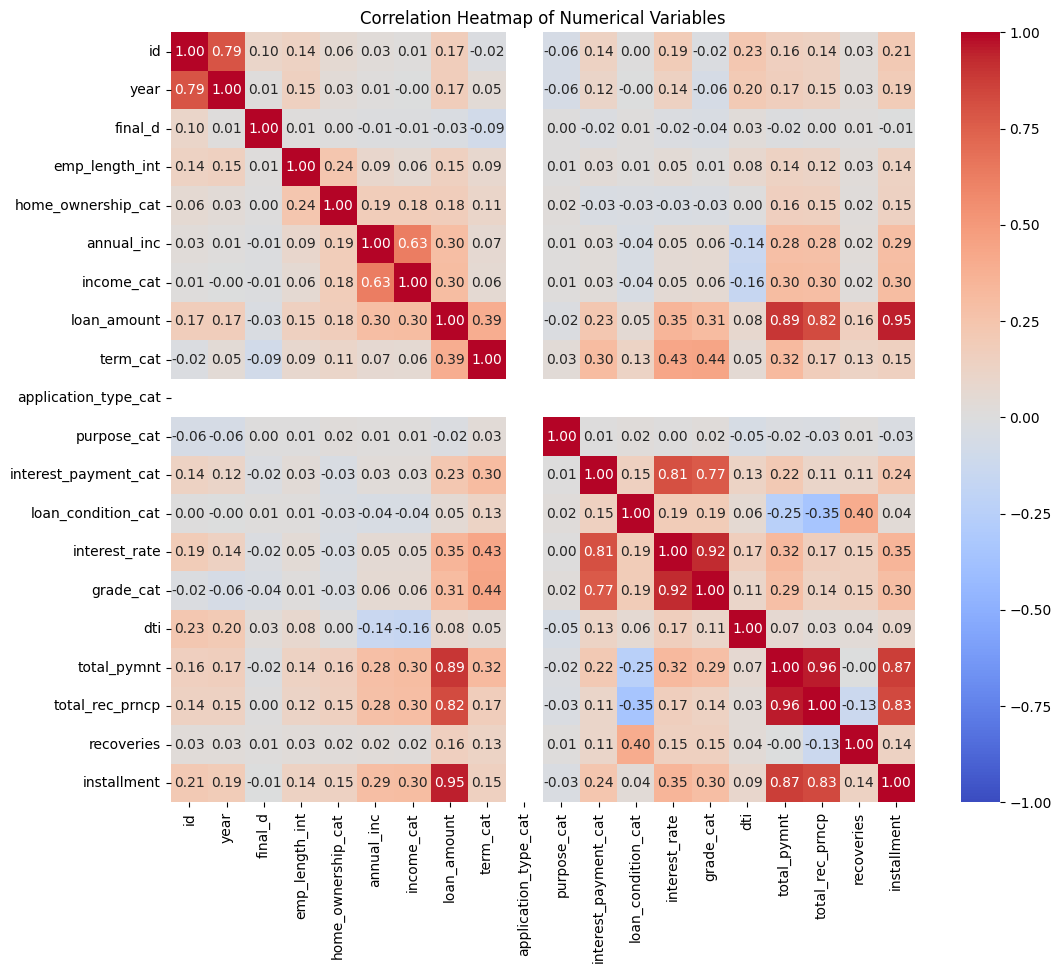

In [25]:
# Select only numerical columns
numerical_df = df.select_dtypes(include=['int64', 'float64'])

# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()


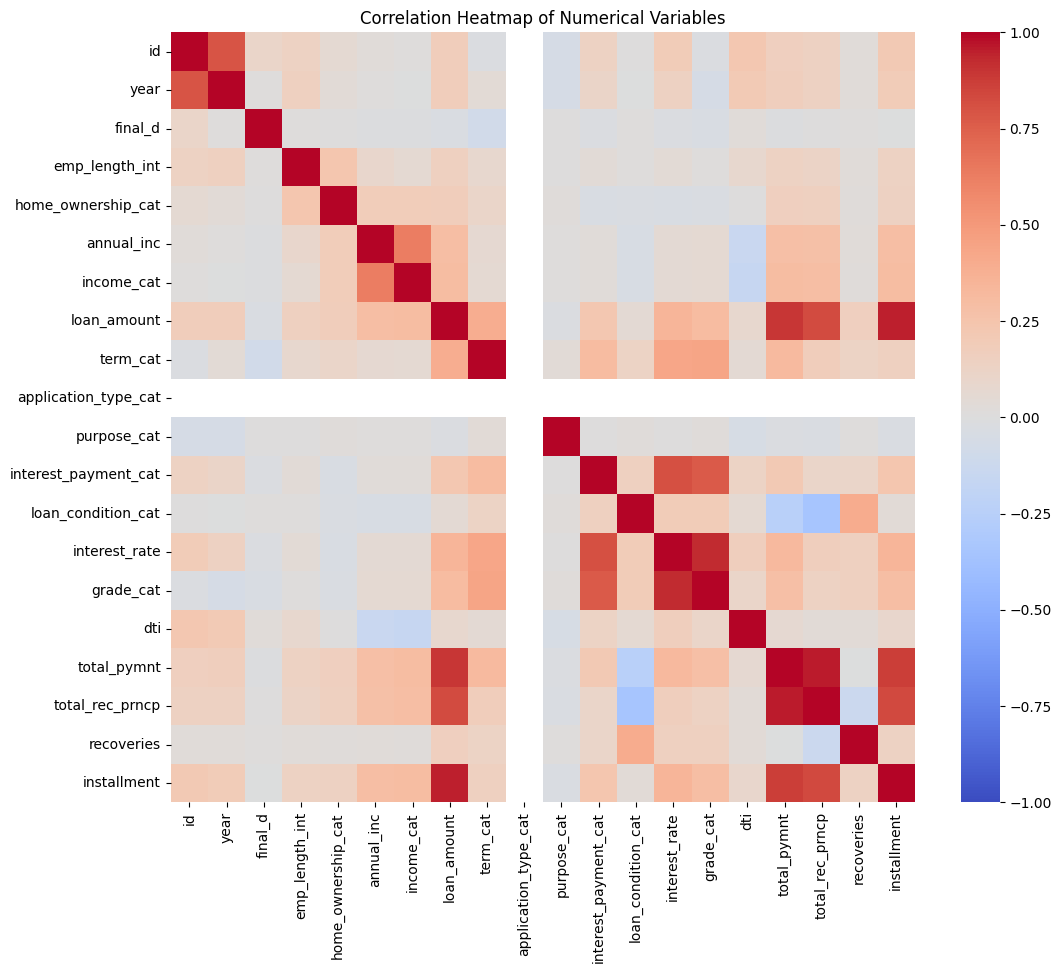

In [26]:
# Plot the heatmap without displaying numerical values
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()


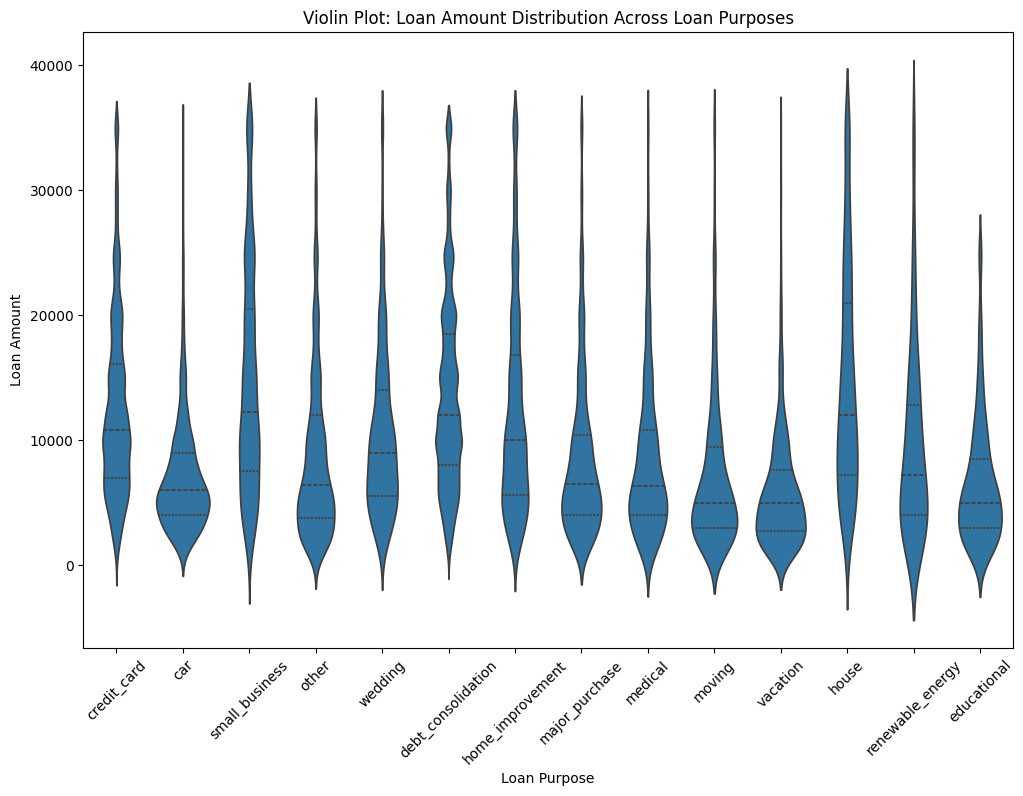

In [27]:
# Violin plot: Loan Amount distribution across Loan Purposes
plt.figure(figsize=(12, 8))
sns.violinplot(x='purpose', y='loan_amount', data=df, inner='quartile')
plt.title('Violin Plot: Loan Amount Distribution Across Loan Purposes')
plt.xlabel('Loan Purpose')
plt.ylabel('Loan Amount')
plt.xticks(rotation=45)
plt.show()


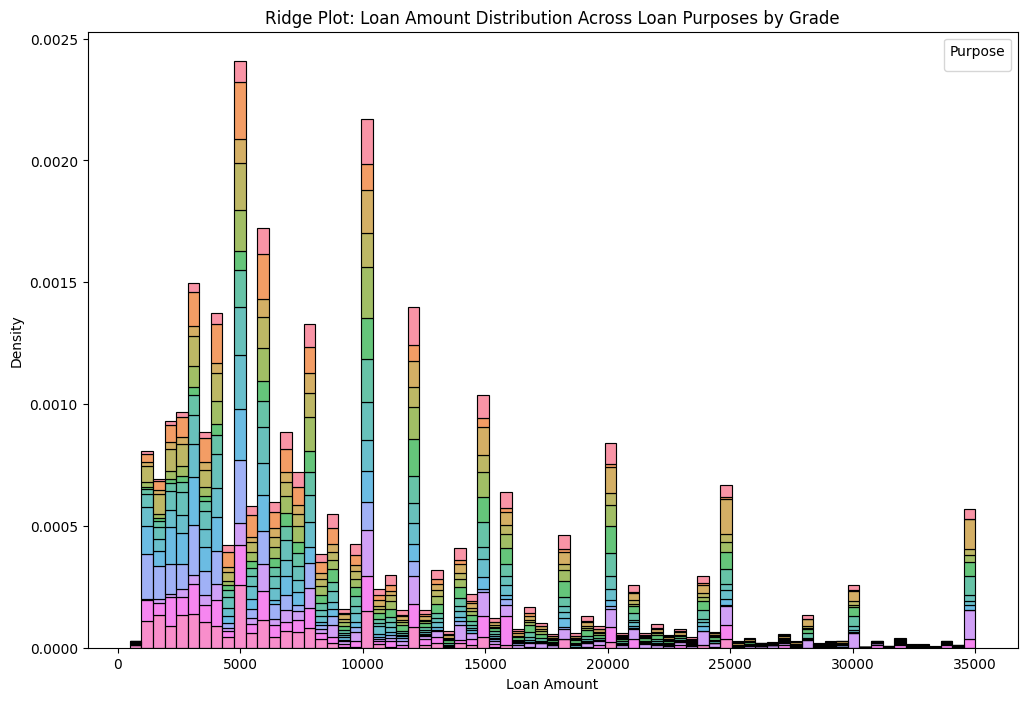

In [28]:
# Ridge Plot
plt.figure(figsize=(12, 8))
sns.histplot(df, x='loan_amount', hue='purpose', multiple='stack', stat='density', common_norm=False)
plt.title('Ridge Plot: Loan Amount Distribution Across Loan Purposes by Grade')
plt.xlabel('Loan Amount')
plt.ylabel('Density')
plt.legend(title='Purpose', bbox_to_anchor=(1, 1))
plt.show()


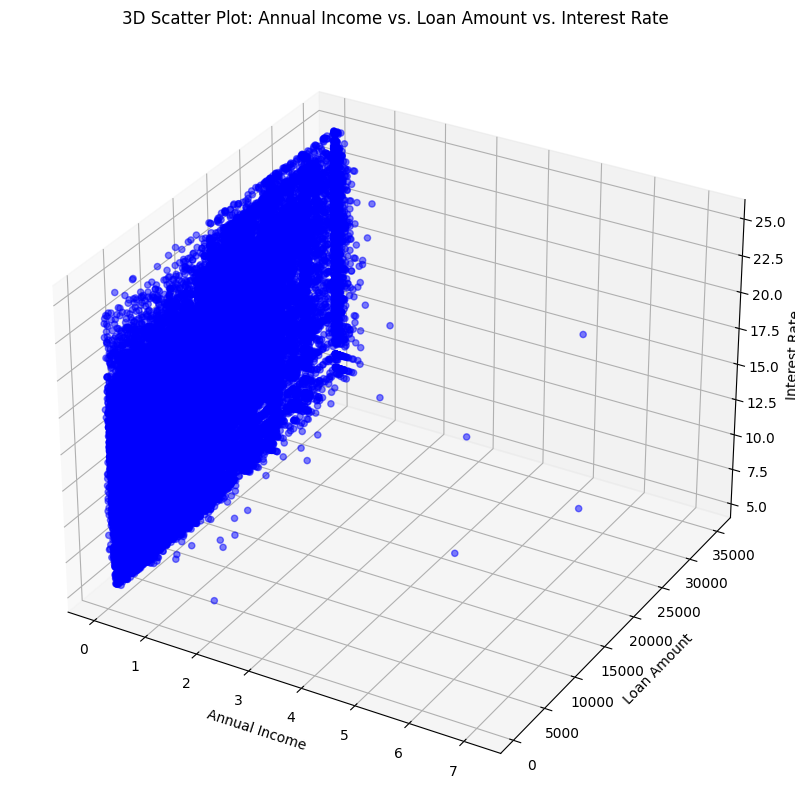

In [30]:
# 3D Scatter Plot for loan amount, annual income, and interest rate
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['annual_inc'], df['loan_amount'], df['interest_rate'], c='blue', marker='o', alpha=0.5)
ax.set_xlabel('Annual Income')
ax.set_ylabel('Loan Amount')
ax.set_zlabel('Interest Rate')
plt.title('3D Scatter Plot: Annual Income vs. Loan Amount vs. Interest Rate')
plt.show()


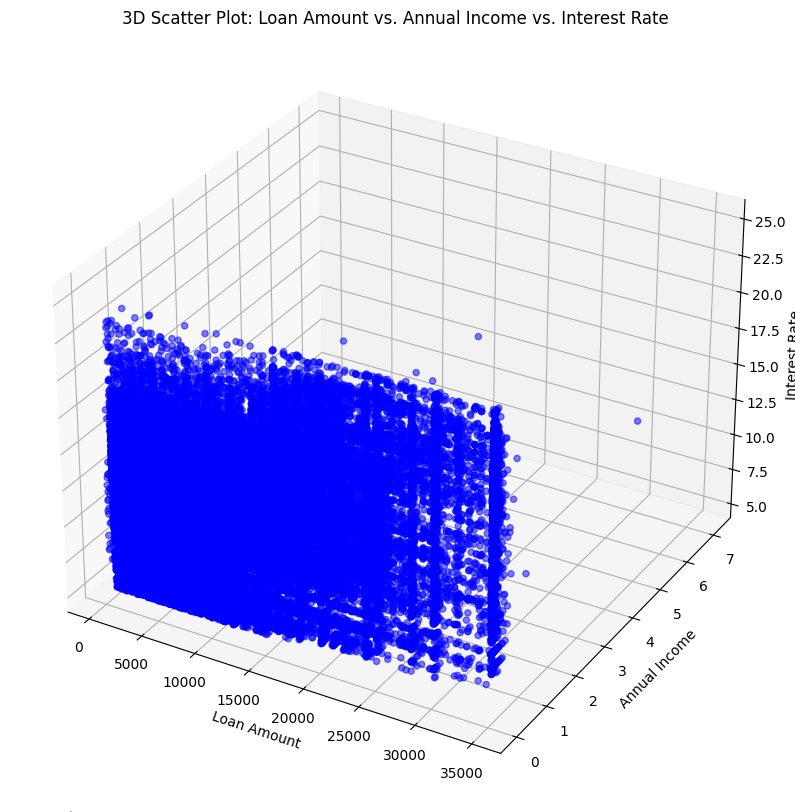

In [31]:

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Extract data from the DataFrame
x = df['loan_amount']
y = df['annual_inc']
z = df['interest_rate']

# Create the 3D scatter plot
ax.scatter(x, y, z, c='blue', marker='o', alpha=0.5)

# Set labels for the axes
ax.set_xlabel('Loan Amount')
ax.set_ylabel('Annual Income')
ax.set_zlabel('Interest Rate')

# Add a title to the plot
plt.title('3D Scatter Plot: Loan Amount vs. Annual Income vs. Interest Rate')

# Show the plot
plt.show()


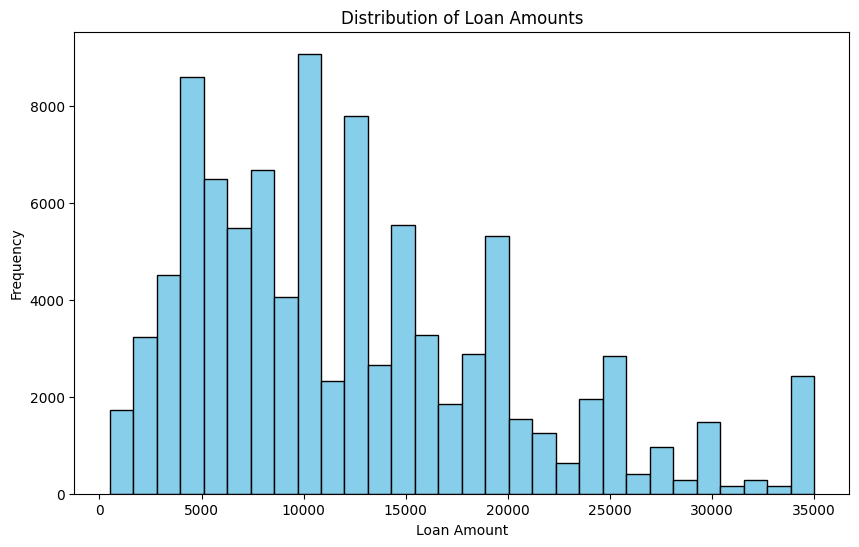

In [33]:
plt.figure(figsize=(10, 6))
plt.hist(df['loan_amount'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Loan Amounts')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()


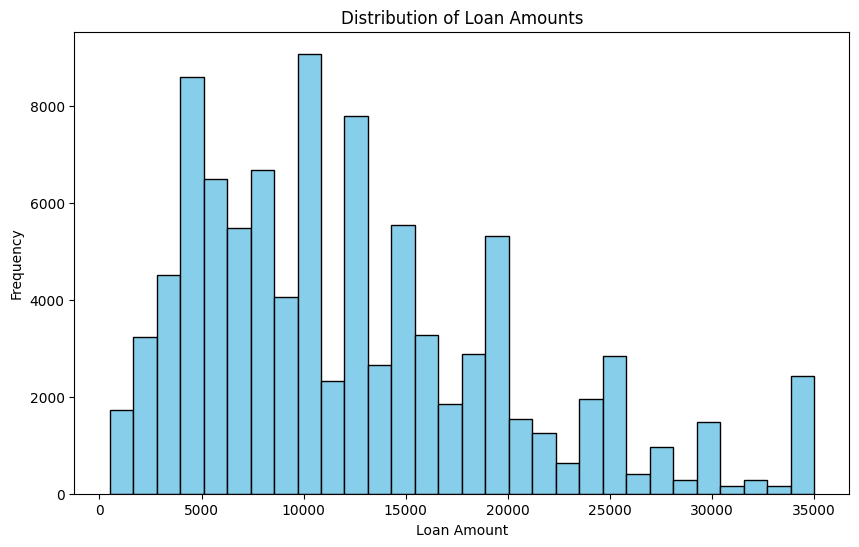

In [53]:
import matplotlib.pyplot as plt

# Extract loan amount values from the DataFrame
loan_amounts = df['loan_amount']

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(loan_amounts, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Loan Amounts')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()


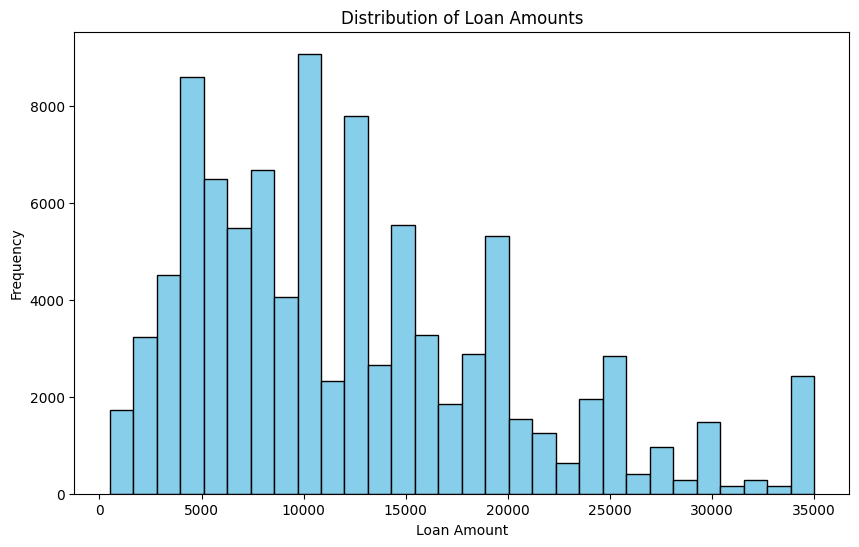

In [54]:
import matplotlib.pyplot as plt

# Extract loan amount values from the DataFrame
loan_amounts = df['loan_amount']

# Define the range for the x-axis
x_min = loan_amounts.min()  # Minimum loan amount
x_max = loan_amounts.max()  # Maximum loan amount
x_range = (x_min, x_max)

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(loan_amounts, bins=30, range=x_range, color='skyblue', edgecolor='black')
plt.title('Distribution of Loan Amounts')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()


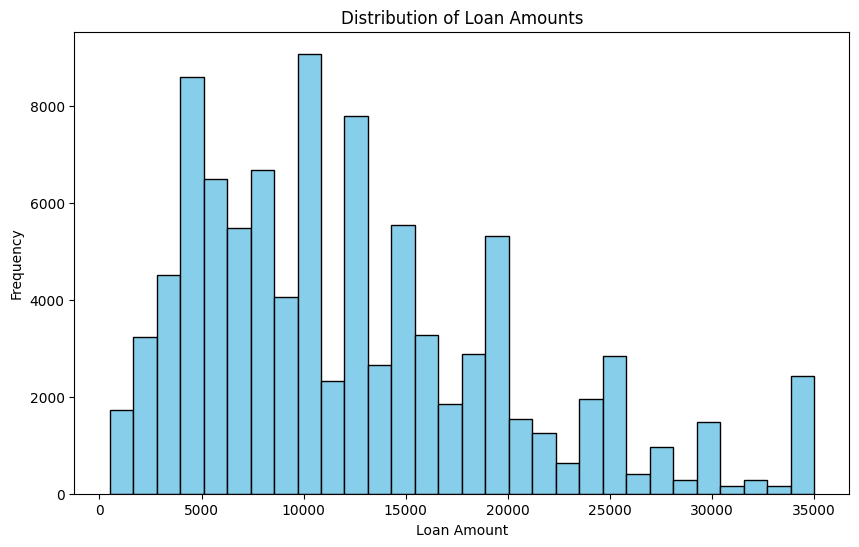

In [55]:
import numpy as np
import matplotlib.pyplot as plt

# Extract loan amount values from the DataFrame
loan_amounts = df['loan_amount']

# Set the desired range for the x-axis
x_min = loan_amounts.min()  # Minimum loan amount
x_max = loan_amounts.max()  # Maximum loan amount
bin_width = (x_max - x_min) / 30  # Calculate the width of each bin
x_values = np.arange(x_min, x_max + bin_width, bin_width)  # Generate x-axis values

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(loan_amounts, bins=x_values, color='skyblue', edgecolor='black')
plt.title('Distribution of Loan Amounts')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()


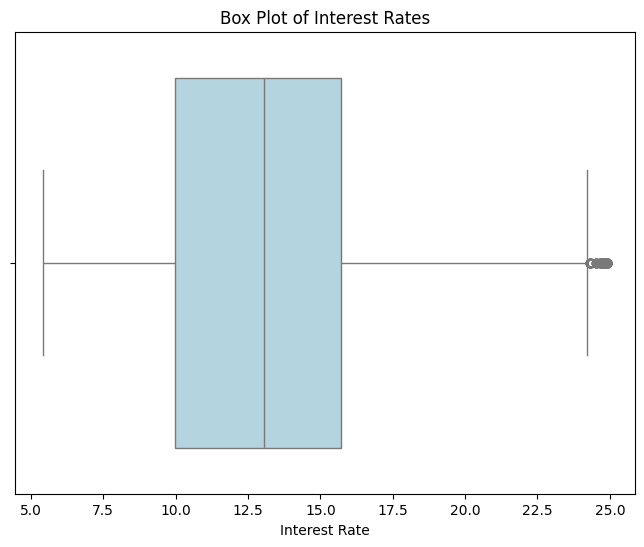

In [34]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='interest_rate', data=df, color='lightblue')
plt.title('Box Plot of Interest Rates')
plt.xlabel('Interest Rate')
plt.show()


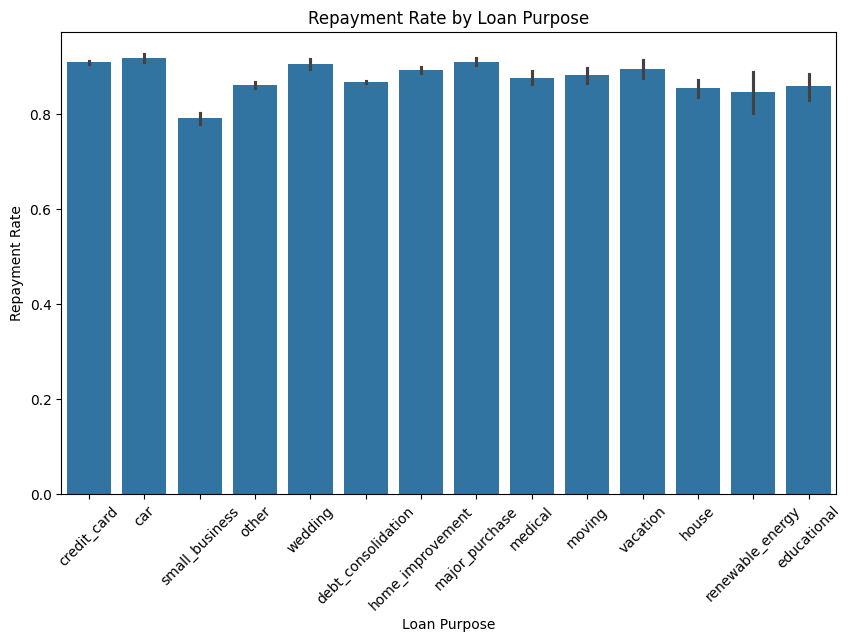

In [35]:
plt.figure(figsize=(10, 6))
sns.barplot(x='purpose', y='repayment_rate', data=df)
plt.title('Repayment Rate by Loan Purpose')
plt.xlabel('Loan Purpose')
plt.ylabel('Repayment Rate')
plt.xticks(rotation=45)
plt.show()


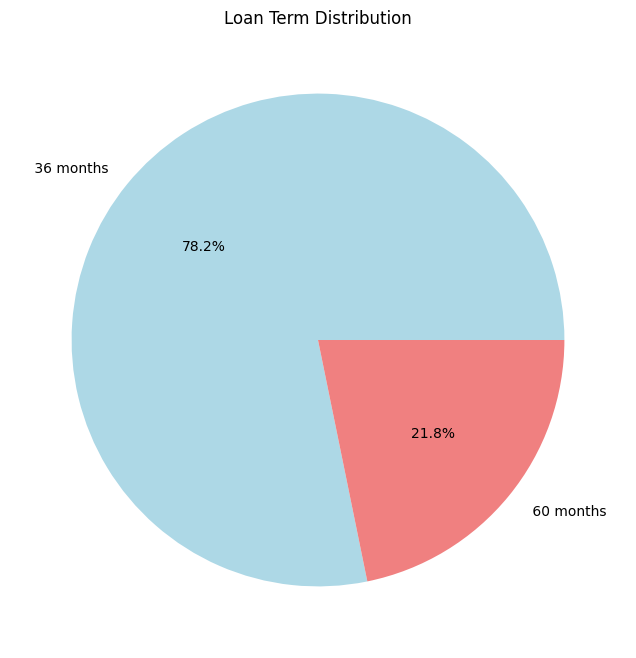

In [37]:
plt.figure(figsize=(8, 8))
term_counts = df['term'].value_counts()
plt.pie(term_counts, labels=term_counts.index, autopct='%1.1f%%', colors=['lightblue', 'lightcoral'])
plt.title('Loan Term Distribution')
plt.show()


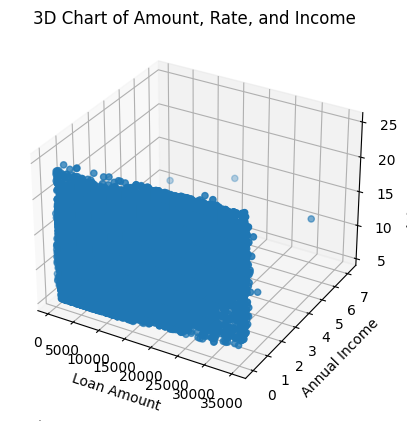

In [42]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['loan_amount'], df['annual_inc'], df['interest_rate'])
ax.set_xlabel('Loan Amount')
ax.set_ylabel(' Annual Income ')
ax.set_zlabel('Interest Rate')
plt.title('3D Chart of Amount, Rate, and Income')
plt.show()

In [48]:
import plotly.express as px

fig = px.scatter_3d(df, x='loan_amount', y='interest_rate', z='annual_inc',color='purpose')
fig.update_layout(scene = dict(
                    xaxis = dict(title  = 'Loan Amount'),
                    yaxis = dict(title  = 'Annual Income'),
                    zaxis = dict(title  = 'Income Rate')))
fig.show()

<Figure size 2000x2000 with 0 Axes>

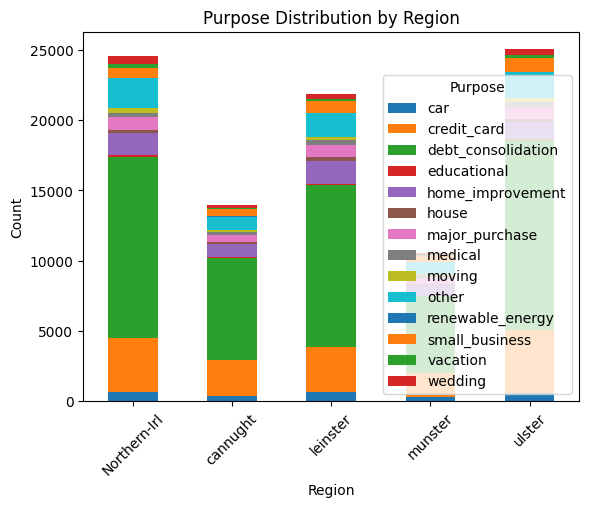

In [51]:
# Create a pivot table to calculate the count of loan purposes by region
purpose_region_counts = df.pivot_table(index='region', columns='purpose', aggfunc='size', fill_value=0)

# Plot the stacked bar plot
plt.figure(figsize=(20,20))
purpose_region_counts.plot(kind='bar', stacked=True)
plt.title('Purpose Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Purpose')
plt.show()


<Figure size 1200x800 with 0 Axes>

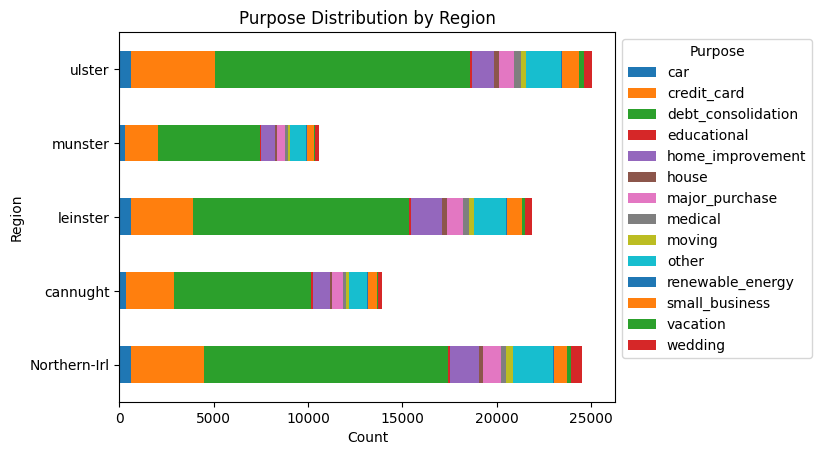

In [52]:
# stacked bar plot
plt.figure(figsize=(12, 8))
purpose_region_counts.plot(kind='barh', stacked=True)
plt.title('Purpose Distribution by Region')
plt.xlabel('Count')
plt.ylabel('Region')
plt.legend(title='Purpose', bbox_to_anchor=(1, 1))
plt.show()
